# Estudos do Capítulo 6 - Decision Trees

In [45]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=None)
tree_clf.fit(X, y)

DecisionTreeClassifier()

In [46]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf, 
    out_file="iris_tree.dot", 
    feature_names=iris.feature_names[2:], 
    class_names=iris.target_names, 
    rounded=True, filled=True
)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, model, title="Decision Boundaries"):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x1_min, x1_max, 500),
        np.linspace(x2_min, x2_max, 500)
    )
    X_new = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(X_new).reshape(xx.shape)

    custom_cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, y_pred, cmap=custom_cmap, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap, edgecolor='k', s=40)
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.title(title)
    plt.grid(True)
    plt.show()


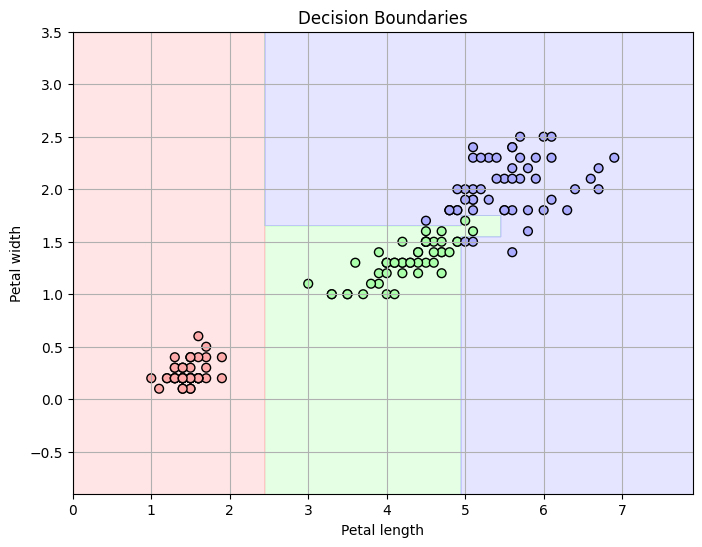

In [48]:
plot_decision_boundaries(X, y, tree_clf)


In [49]:
tree_clf.predict_proba([[5, 1.5]])

array([[0., 0., 1.]])

In [50]:
tree_clf.predict([[5, 1.5]])

array([2])